# Задание: Центральная предельная теорема своими руками

Подключаем необходимые библиотеки.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

## Бета-распределение

Определим бета-распределение и его теоретические характеристики.

In [136]:
A, B = 0.5, 0.5
beta = sts.beta(a = A, b = B)

#математическое ожидание и дисперсия
EX = A / (A + B)
DX = A * B / (A + B)**2 / (A + B + 1)

Сгенерируем выборку из распределения и построим гистограмму выборки с теоретической плотностью.

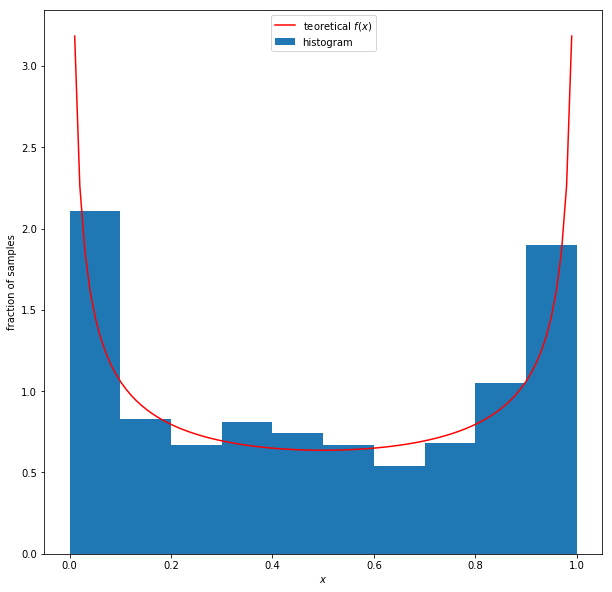

In [141]:
plt.figure(figsize=(10, 10))

#выборка
sample = beta.rvs(1000)

#гистограмма
plt.hist(sample, density=True, label='histogram')

#плотность
x = np.linspace(0, 1, 100)
pdf = beta.pdf(x)
plt.plot(x, pdf, color='r', label='teoretical $f(x)$')

plt.legend()
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.show()

Как мы видим, данное распределение сильно отличается от нормального.

## Оценка распределения выборочного среднего

Исследуем распределение выборочных средних при разных объемах выборок.

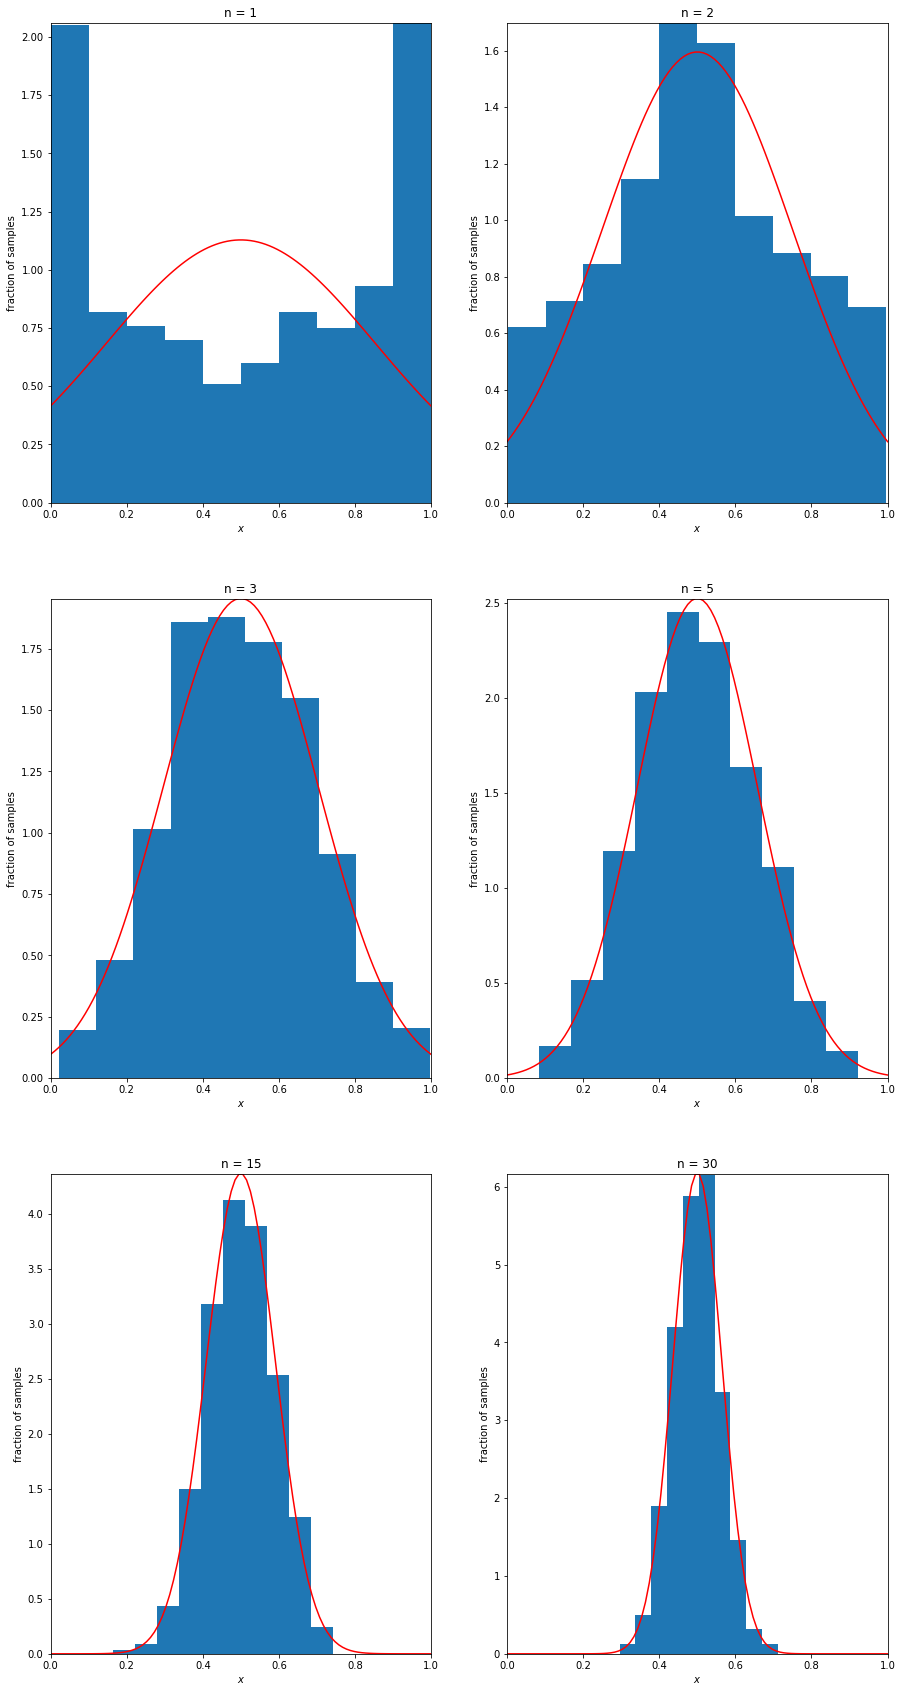

In [149]:
plt.figure(figsize=(15, 30))
x = np.linspace(0, 1, 100)

#параметры выборок
values = [1, 2, 3, 5, 15, 30]
size = 1000

for i in range(len(values)):
    n = values[i]
    
    #конфигурация графиков
    plt.subplot(len(values) / 2, 2, i + 1).margins(0)
    plt.title("n = %s" % str(n))
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    
    #генерация выборок и расчет выборочных средних
    means = []
    for j in range(size):
        sample = beta.rvs(n)
        means.append(sample.mean())
    
    #гистрограма
    plt.hist(means, density=True)
    
    #нормальное распределение с теоретически 
    #расчитанными параметрами (см. ранее)
    pdf = sts.norm(loc=EX, scale=(DX / n)**0.5).pdf(x)
    plt.plot(x, pdf, color='r')

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

## Вывод

Были исследованные характеристики выборочного среднего бета-распределения и выявленно, что при генерации от 30 выборок размера 1000 центральная предельная теорема даёт хорошее приближение искомой функции распределения.